In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd

# Leer el archivo CSV cargado
df = pd.read_csv('Mall_Customers.csv')

# Verificar que el archivo se haya cargado correctamente
df.head()  # Esto mostrará las primeras filas del dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.head()  # Esto mostrará las primeras 5 filas del dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


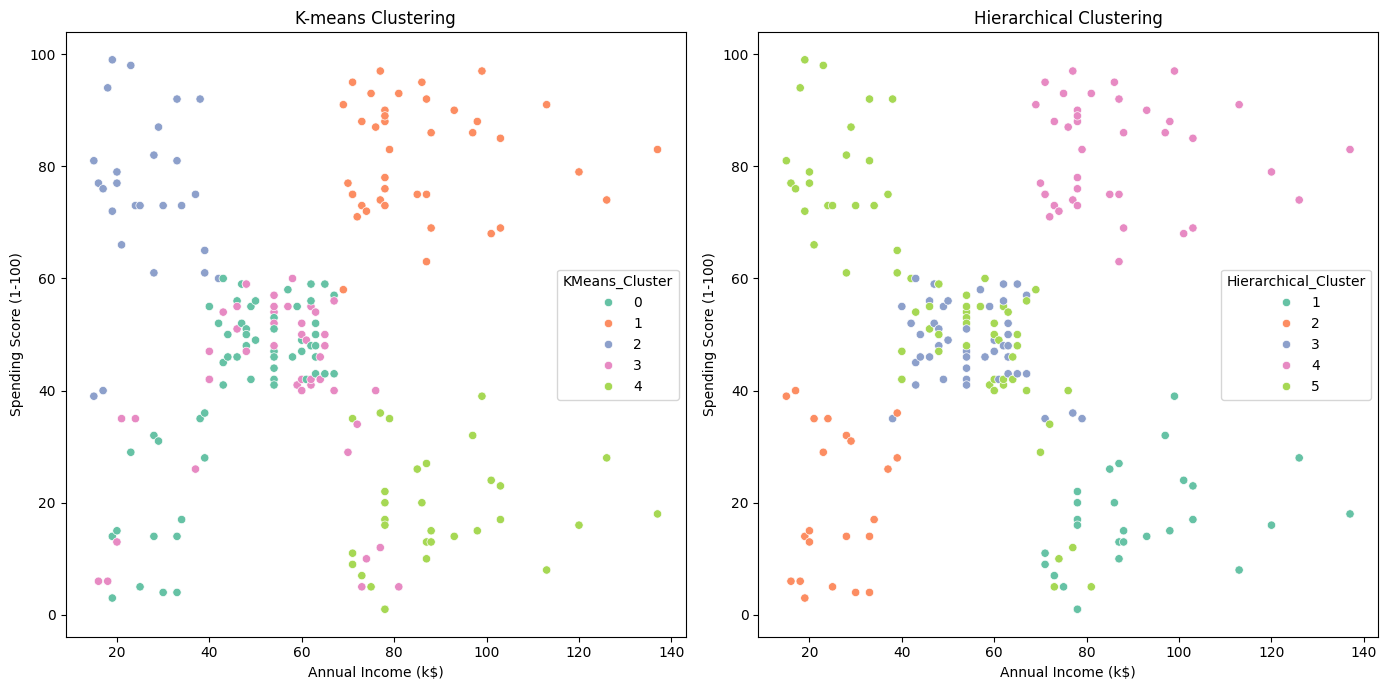

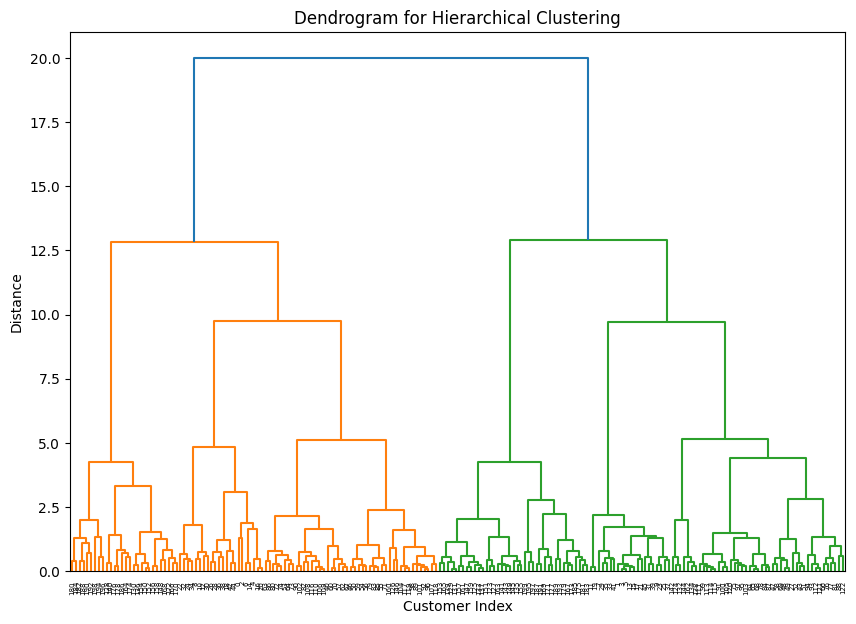

In [6]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para clustering
df_clustering = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Estandarizar los datos (para K-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# 1. K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# 2. Hierarchical Clustering
Z = linkage(df_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(Z, t=5, criterion='maxclust')

# Visualización de los clusters en ambos métodos
plt.figure(figsize=(14, 7))

# K-means Clustering (Gráfico de dispersión)
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Set2', data=df)
plt.title('K-means Clustering')

# Hierarchical Clustering (Gráfico de dispersión)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='Set2', data=df)
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

# Dendrograma para clustering jerárquico
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   KMeans_Cluster          200 non-null    int32 
 6   Hierarchical_Cluster    200 non-null    int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 9.5+ KB


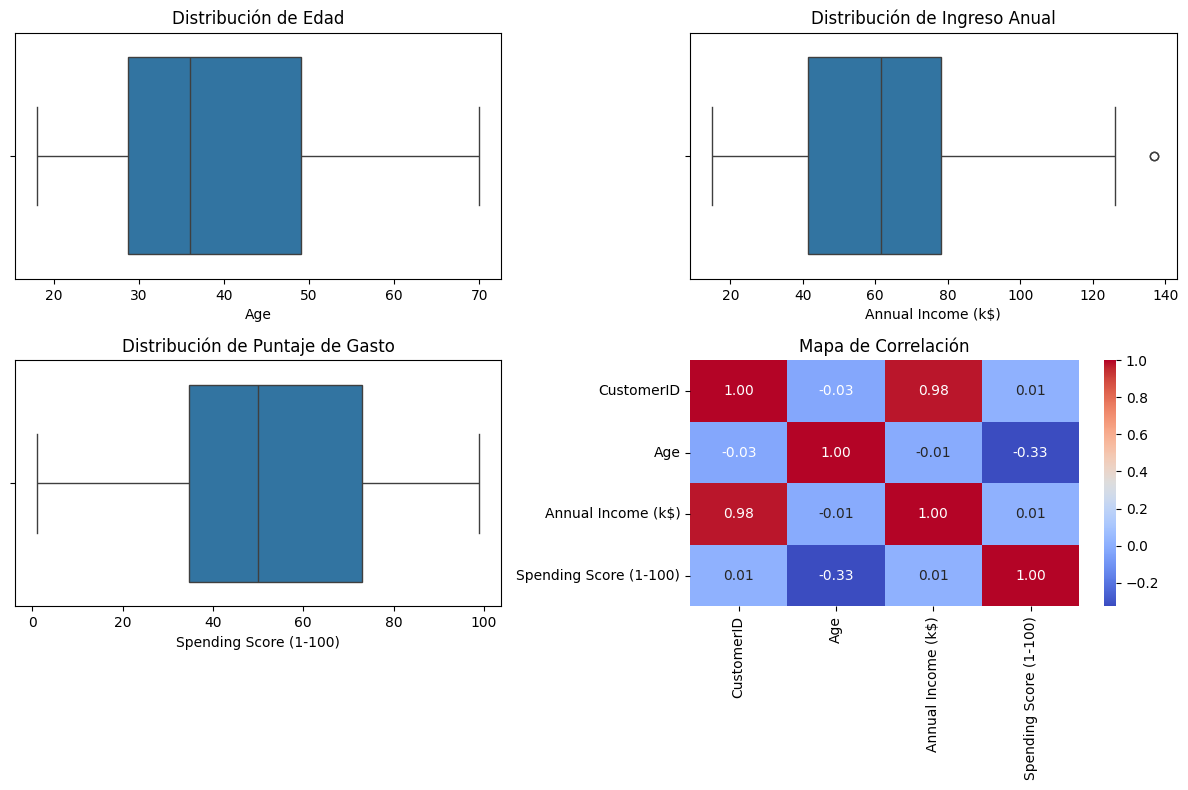

(None,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 KMeans_Cluster            0
 Hierarchical_Cluster      0
 dtype: int64,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
 count  200.000000  200.000000          200.000000              200.000000   
 mean   100.500000   38.850000           60.560000               50.200000   
 std     57.879185   13.969007           26.264721               25.823522   
 min      1.000000   18.000000           15.000000                1.000000   
 25%     50.750000   28.750000           41.500000               34.750000   
 50%    100.500000   36.000000           61.500000               50.000000   
 75%    150.250000   49.000000           78.000000               73.000000   
 max    200.000000   70.000000          137.000000               99.000000   
 
        KMeans_Cluster  Hierarchical_Cluster  
 count      200.000000  

In [8]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Información general sobre el dataset
df_info = df.info()

# 2. Comprobar si hay valores nulos
missing_values = df.isnull().sum()

# 3. Estadísticas descriptivas para variables numéricas
summary_statistics = df.describe()

# 4. Identificación de valores atípicos visualmente
plt.figure(figsize=(12, 8))

# Gráfico de caja para la Edad, Ingreso Anual y Puntaje de Gasto
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Distribución de Edad')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Distribución de Ingreso Anual')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Distribución de Puntaje de Gasto')

# Visualización de la correlación entre variables (solo columnas numéricas)
plt.subplot(2, 2, 4)

# Seleccionamos solo las columnas numéricas para la correlación
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')

plt.tight_layout()
plt.show()

# Resultados del análisis exploratorio
df_info, missing_values, summary_statistics



In [9]:
# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Tratamiento de valores faltantes (verificar si hay algún valor nulo)
missing_values = df.isnull().sum()

# Si hubiera valores faltantes, podemos decidir qué hacer. Por ejemplo, imputar valores con la media o eliminar filas.
# En este caso, sabemos que no hay valores faltantes, pero si fuera necesario:
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# 2. Convertir variables categóricas a variables numéricas
# Usaremos LabelEncoder para convertir la columna "Gender" (categórica) en numérica.
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 3. Escalado de variables numéricas (Edad, Ingreso Anual, Puntaje de Gasto)
# Utilizamos StandardScaler para normalizar las características.
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# 4. Tratamiento de valores atípicos (Opcional)
# Identificar y eliminar valores atípicos (si lo consideramos necesario). A continuación mostramos un ejemplo de cómo hacerlo.

# Usamos el método IQR (Rango Intercuartílico) para detectar valores atípicos:
Q1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos
df_cleaned = df[~((df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar información sobre los datos después del preprocesamiento
df_info_after = df_cleaned.info()

df_info_after


<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              198 non-null    int64  
 1   Gender                  198 non-null    int64  
 2   Age                     198 non-null    float64
 3   Annual Income (k$)      198 non-null    float64
 4   Spending Score (1-100)  198 non-null    float64
 5   KMeans_Cluster          198 non-null    int32  
 6   Hierarchical_Cluster    198 non-null    int32  
dtypes: float64(3), int32(2), int64(2)
memory usage: 10.8 KB


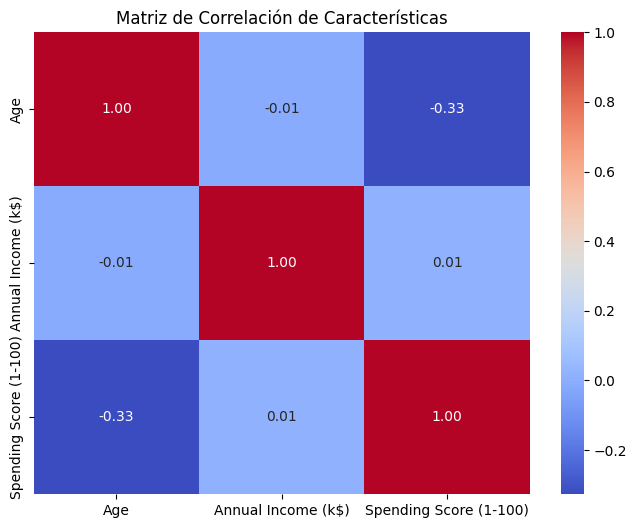

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,1,-1.424569,-1.738999,-0.434801,2,2
1,2,1,-1.281035,-1.738999,1.195704,2,5
2,3,0,-1.352802,-1.700830,-1.715913,3,2
3,4,0,-1.137502,-1.700830,1.040418,2,5
4,5,0,-0.563369,-1.662660,-0.395980,2,2


In [10]:
# Calcular la matriz de correlación
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Características')
plt.show()

# Eliminar características que están altamente correlacionadas (correlación > 0.9)
# Identificar las columnas con alta correlación
correlation_threshold = 0.9
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Eliminar columnas altamente correlacionadas
df_selected = df.drop(columns=high_corr_features)

# Ver los datos después de eliminar características altamente correlacionadas
df_selected.head()


In [11]:
# Importar RFE y un estimador para seleccionar características
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Usamos un modelo básico para RFE

# Aplicar RFE para seleccionar las características más importantes
estimator = LogisticRegression(max_iter=10000)  # Utilizamos regresión logística como estimador
selector = RFE(estimator, n_features_to_select=2)  # Seleccionamos las dos características más relevantes
selector = selector.fit(df_selected[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['KMeans_Cluster'])  # Usamos los datos para entrenar el selector

# Ver qué características son seleccionadas
selected_features = pd.DataFrame({'Feature': df_selected[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].columns,
                                  'Selected': selector.support_})

# Mostrar las características seleccionadas
selected_features


,Feature,Selected
0,Age,False
1,Annual Income (k$),True
2,Spending Score (1-100),True


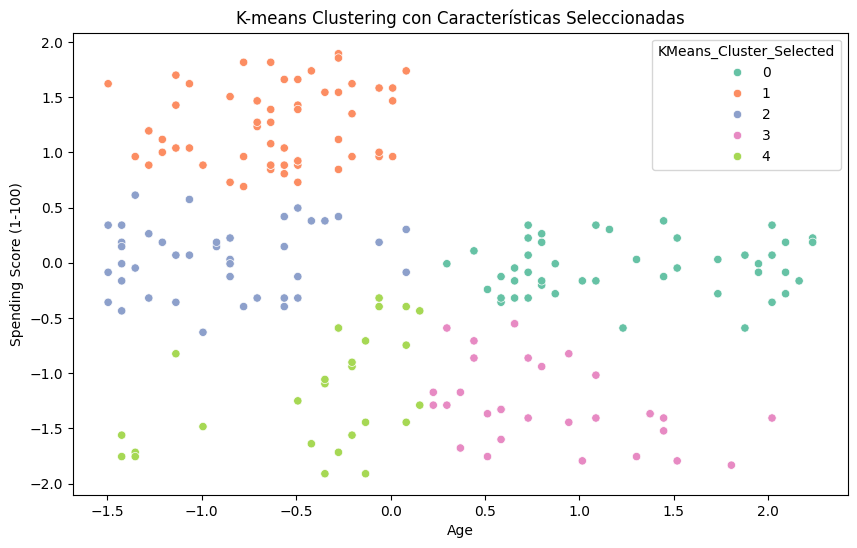

In [12]:
# Seleccionar las características relevantes para el clustering
df_clustering_selected = df_selected[['Age', 'Spending Score (1-100)']]  # Por ejemplo, si RFE seleccionó estas

# Preprocesar los datos (escalado) antes de entrenar el modelo de clustering
scaler = StandardScaler()
df_scaled_selected = scaler.fit_transform(df_clustering_selected)

# Entrenar el modelo K-means con las características seleccionadas
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster_Selected'] = kmeans.fit_predict(df_scaled_selected)

# Visualizar los resultados de clustering con las características seleccionadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['KMeans_Cluster_Selected'], palette='Set2')
plt.title('K-means Clustering con Características Seleccionadas')
plt.show()


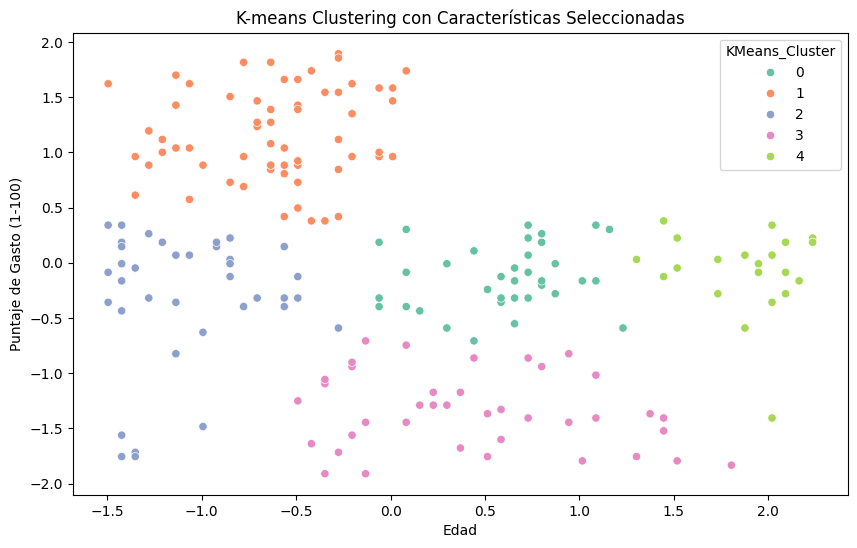

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Configuración de los hiperparámetros de K-means
kmeans = KMeans(
    n_clusters=5,             # Número de clústeres (puedes probar diferentes valores)
    init='k-means++',         # Método de inicialización de los centroides
    n_init=10,                # Número de inicializaciones del algoritmo
    max_iter=300,             # Número máximo de iteraciones
    random_state=42           # Semilla para reproducibilidad
)

# Entrenar el modelo K-means con las características seleccionadas
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled_selected)

# Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('K-means Clustering con Características Seleccionadas')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()


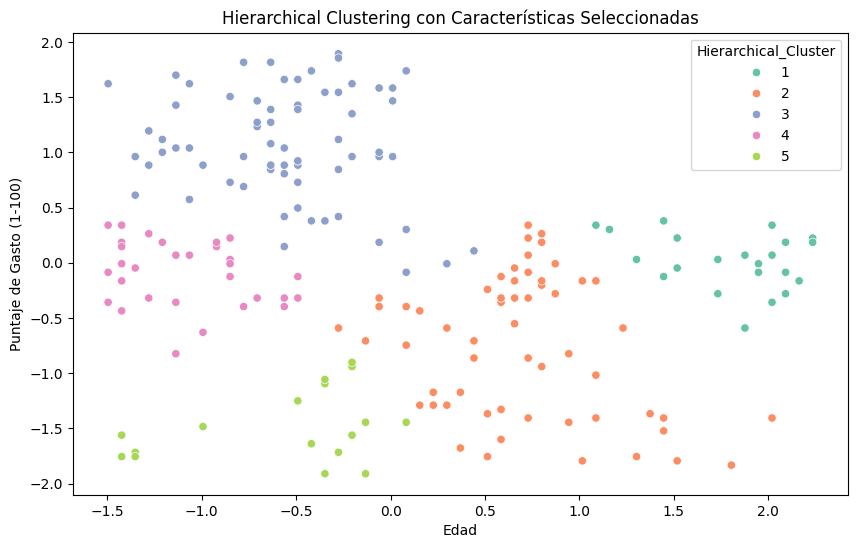

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster

# 1. Configuración de los hiperparámetros de Hierarchical Clustering
Z = linkage(df_scaled_selected, method='ward', metric='euclidean')  # Método de Ward y métrica euclidiana

# Crear los clústeres basados en el corte de los resultados de linkage
df['Hierarchical_Cluster'] = fcluster(Z, t=5, criterion='maxclust')  # Elegimos 5 clústeres

# Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering con Características Seleccionadas')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()


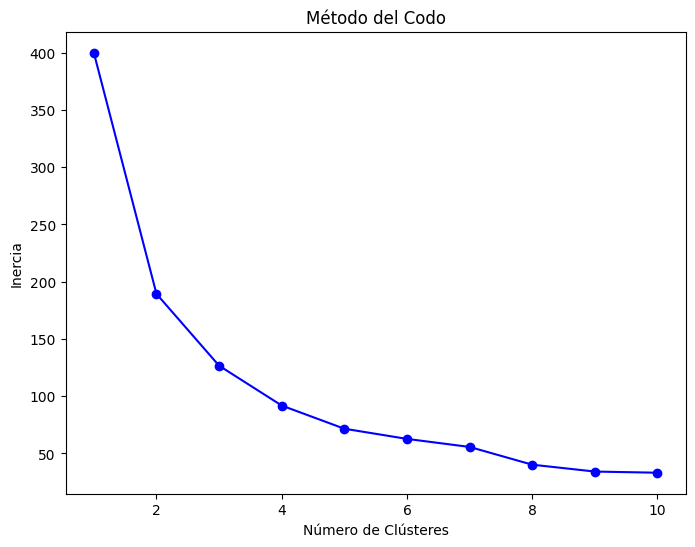

In [15]:
# Método del codo para encontrar el número óptimo de clústeres
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_selected)
    inertia.append(kmeans.inertia_)

# Visualizar el gráfico del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette para el modelo K-means
silhouette_kmeans = silhouette_score(df_scaled_selected, df['KMeans_Cluster'])
print(f'Coeficiente de Silhouette para K-means: {silhouette_kmeans}')

# Calcular el coeficiente de Silhouette para el modelo Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled_selected, df['Hierarchical_Cluster'])
print(f'Coeficiente de Silhouette para Hierarchical Clustering: {silhouette_hierarchical}')


Coeficiente de Silhouette para K-means: 0.4475485887887892
Coeficiente de Silhouette para Hierarchical Clustering: 0.3764554127969014


In [17]:
# Importar las métricas de evaluación
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# 1. Evaluar el Coeficiente de Silhouette para K-means
silhouette_kmeans = silhouette_score(df_scaled_selected, df['KMeans_Cluster'])
print(f'Coeficiente de Silhouette para K-means: {silhouette_kmeans}')

# 2. Evaluar el Coeficiente de Silhouette para Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled_selected, df['Hierarchical_Cluster'])
print(f'Coeficiente de Silhouette para Hierarchical Clustering: {silhouette_hierarchical}')

# 3. Evaluar el Índice de Calinski-Harabasz para K-means
calinski_kmeans = calinski_harabasz_score(df_scaled_selected, df['KMeans_Cluster'])
print(f'Índice de Calinski-Harabasz para K-means: {calinski_kmeans}')

# 4. Evaluar el Índice de Calinski-Harabasz para Hierarchical Clustering
calinski_hierarchical = calinski_harabasz_score(df_scaled_selected, df['Hierarchical_Cluster'])
print(f'Índice de Calinski-Harabasz para Hierarchical Clustering: {calinski_hierarchical}')

# 5. Evaluar el Índice de Davies-Bouldin para K-means
davies_bouldin_kmeans = davies_bouldin_score(df_scaled_selected, df['KMeans_Cluster'])
print(f'Índice de Davies-Bouldin para K-means: {davies_bouldin_kmeans}')

# 6. Evaluar el Índice de Davies-Bouldin para Hierarchical Clustering
davies_bouldin_hierarchical = davies_bouldin_score(df_scaled_selected, df['Hierarchical_Cluster'])
print(f'Índice de Davies-Bouldin para Hierarchical Clustering: {davies_bouldin_hierarchical}')


Coeficiente de Silhouette para K-means: 0.4475485887887892
Coeficiente de Silhouette para Hierarchical Clustering: 0.3764554127969014
Índice de Calinski-Harabasz para K-means: 224.75929539265536
Índice de Calinski-Harabasz para Hierarchical Clustering: 189.39219928257083
Índice de Davies-Bouldin para K-means: 0.7570538193682084
Índice de Davies-Bouldin para Hierarchical Clustering: 0.8238969079630065
